<a href="https://colab.research.google.com/github/fajarsi/Analisis-Sentimen-Menggunakan-Jupiter-Notebook/blob/main/Analisis_Sentiment_Pemblokiran_Kominfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Sastrawi
!pip install PySastrawi
!pip install tweet-preprocessor
!pip install emoji
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 4.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 4.2 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=2a9b8b1510e7a51f53bedb64cf9adf660bfa93ce9cc43c9874e9f0948dd5040f
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
import tweepy
import re
import string
from textblob import TextBlob
import preprocessor as p
from preprocessor.api import clean, tokenize, parse
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import datetime
from datetime import timedelta
import numpy as np
import emoji
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
consumer_key = "RkOQAG4BSqN3uw9igM9VD4eU6"
consumer_key_secret = "YhjjGoJkHK6KqMxHOqgrQnEhuDj7J5jT7orPzXyrkyWIq9N7SH"
access_token = "1501013222526263297-3F6GBennQQOXjjVbWDaLq61XGvddYN"
access_token_secret = "5V1idbAmeY9HWsPRq4omH5ZFpQYbDwyfuOR2wM0SjaqjA"

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=False, compression=True)

def scraptweets(search_words, date_since, date_until):

    db_tweets = pd.DataFrame(columns=['username','tweetcreatedts', 'text'])
    tweets = tweepy.Cursor(
                        api.search, q=search_words, lang="id",
                        since=date_since, until=date_until, tweet_mode='extended').items(1000)
    tweet_list = [tweet for tweet in tweets]
    
    for tweet in tweet_list:
        username = tweet.user.screen_name
        tweetcreatedts = tweet.created_at
        
        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text
            
        ith_tweet = [username, tweetcreatedts, text]
        
        db_tweets.loc[len(db_tweets)] = ith_tweet
        print('proses scrapping selesai dengan jumlah data', len(db_tweets))
    filename = 'pemblokiran.csv'
    db_tweets.to_csv(filename, index=False)
        
        
        
today = datetime.date.today().strftime("%Y-%m-%d")
last_week = datetime.date.today() - timedelta(360)
last_week = last_week.strftime("%Y-%m-%d")
    
search_words = "steam"
date_since = "2022-07-01"
date_untill = today
    
scraptweets (search_words, date_since, date_untill)

proses scrapping selesai dengan jumlah data 1
proses scrapping selesai dengan jumlah data 2
proses scrapping selesai dengan jumlah data 3
proses scrapping selesai dengan jumlah data 4
proses scrapping selesai dengan jumlah data 5
proses scrapping selesai dengan jumlah data 6
proses scrapping selesai dengan jumlah data 7
proses scrapping selesai dengan jumlah data 8
proses scrapping selesai dengan jumlah data 9
proses scrapping selesai dengan jumlah data 10
proses scrapping selesai dengan jumlah data 11
proses scrapping selesai dengan jumlah data 12
proses scrapping selesai dengan jumlah data 13
proses scrapping selesai dengan jumlah data 14
proses scrapping selesai dengan jumlah data 15
proses scrapping selesai dengan jumlah data 16
proses scrapping selesai dengan jumlah data 17
proses scrapping selesai dengan jumlah data 18
proses scrapping selesai dengan jumlah data 19
proses scrapping selesai dengan jumlah data 20
proses scrapping selesai dengan jumlah data 21
proses scrapping seles

In [ ]:
import pandas as pd
def load_data():
    data = pd.read_csv('pemblokiran.csv')
    return data

In [ ]:
tweet_df = load_data()

In [ ]:
tweet_df = pd.DataFrame(tweet_df[['username', 'tweetcreatedts', 'text']])
tweet_df.head(10)

,username,tweetcreatedts,text
0,yangmahagung,2022-07-31 23:59:57,@adhityoagam @sbyfess koncoku sek isok main steam
1,TamakiKarakuri,2022-07-31 23:59:54,"PayPal Steam Di blokir situs judi online, inv..."
2,andy_mahardika,2022-07-31 23:59:50,"@fluxcup Karya anak bangsa, ini.. cikal bakal ..."
3,diemutnangis,2022-07-31 23:59:41,Orang gila. Disuruh ngeluarin duit 15T untuk b...
4,ggaramk,2022-07-31 23:59:40,Orang gila. Disuruh ngeluarin duit 15T untuk b...
5,okutaphutafu,2022-07-31 23:59:30,"""Orang buta politik begitu bodoh, sehingga ia ..."
6,flowsunshines,2022-07-31 23:59:22,Rekomendasi sepatu sneakers tanpa tali /kereta...
7,mansei,2022-07-31 23:59:21,[Thread] Melawan analogi-analogi bodoh\n\n1. A...
8,Andoreasuu,2022-07-31 23:59:20,[Thread] Melawan analogi-analogi bodoh\n\n1. A...
9,William92145274,2022-07-31 23:59:18,[SHARE INFO] \n\nBuat kalian yang mau main gam...


In [ ]:
def remove_pattern(text, pattern_regex):
  r = re.findall(pattern_regex, text)
  for i in r:
      text = re.sub(i, '', text)
  return text

In [ ]:
tweet_df['clean_tweet']= np.vectorize(remove_pattern)(tweet_df['text'], " *RT* | *@[\w]*")
tweet_df.head()

,username,tweetcreatedts,text,clean_tweet
0,yangmahagung,2022-07-31 23:59:57,@adhityoagam @sbyfess koncoku sek isok main steam,koncoku sek isok main steam
1,TamakiKarakuri,2022-07-31 23:59:54,"PayPal Steam Di blokir situs judi online, inv...","PayPal Steam Di blokir situs judi online, inv..."
2,andy_mahardika,2022-07-31 23:59:50,"@fluxcup Karya anak bangsa, ini.. cikal bakal ...","Karya anak bangsa, ini.. cikal bakal buat gan..."
3,diemutnangis,2022-07-31 23:59:41,Orang gila. Disuruh ngeluarin duit 15T untuk b...,Orang gila. Disuruh ngeluarin duit 15T untuk b...
4,ggaramk,2022-07-31 23:59:40,Orang gila. Disuruh ngeluarin duit 15T untuk b...,Orang gila. Disuruh ngeluarin duit 15T untuk b...


In [ ]:
tweet_df.drop_duplicates(subset ="text", keep = 'first', inplace = True)
tweet_df.head()

,username,tweetcreatedts,text,clean_tweet
0,yangmahagung,2022-07-31 23:59:57,@adhityoagam @sbyfess koncoku sek isok main steam,koncoku sek isok main steam
1,TamakiKarakuri,2022-07-31 23:59:54,"PayPal Steam Di blokir situs judi online, inv...","PayPal Steam Di blokir situs judi online, inv..."
2,andy_mahardika,2022-07-31 23:59:50,"@fluxcup Karya anak bangsa, ini.. cikal bakal ...","Karya anak bangsa, ini.. cikal bakal buat gan..."
3,diemutnangis,2022-07-31 23:59:41,Orang gila. Disuruh ngeluarin duit 15T untuk b...,Orang gila. Disuruh ngeluarin duit 15T untuk b...
5,okutaphutafu,2022-07-31 23:59:30,"""Orang buta politik begitu bodoh, sehingga ia ...","""Orang buta politik begitu bodoh, sehingga ia ..."


In [ ]:
tweet_df.drop_duplicates(subset ="text", keep = 'first', inplace = True)
tweet_df.head()
def remove(text):
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return text
tweet_df['remove_http'] = tweet_df['clean_tweet'].apply(lambda x: remove(x))
tweet_df.head()

,username,tweetcreatedts,text,clean_tweet,remove_http
0,yangmahagung,2022-07-31 23:59:57,@adhityoagam @sbyfess koncoku sek isok main steam,koncoku sek isok main steam,koncoku sek isok main steam
1,TamakiKarakuri,2022-07-31 23:59:54,"PayPal Steam Di blokir situs judi online, inv...","PayPal Steam Di blokir situs judi online, inv...",PayPal Steam Di blokir situs judi online inves...
2,andy_mahardika,2022-07-31 23:59:50,"@fluxcup Karya anak bangsa, ini.. cikal bakal ...","Karya anak bangsa, ini.. cikal bakal buat gan...",Karya anak bangsa ini cikal bakal buat ganti s...
3,diemutnangis,2022-07-31 23:59:41,Orang gila. Disuruh ngeluarin duit 15T untuk b...,Orang gila. Disuruh ngeluarin duit 15T untuk b...,Orang gila Disuruh ngeluarin duit 15T untuk bi...
5,okutaphutafu,2022-07-31 23:59:30,"""Orang buta politik begitu bodoh, sehingga ia ...","""Orang buta politik begitu bodoh, sehingga ia ...",Orang buta politik begitu bodoh sehingga ia ba...


In [ ]:
def remov(tweet):

    tweet = re.sub(r'\$\w*', '', tweet)

    tweet = re.sub(r'^RT[\s]+', '', tweet)

    tweet = re.sub(r'#', '', tweet)

    tweet = re.sub('[0-9]+', '', tweet)

    return tweet
tweet_df['remove_hastag'] = tweet_df['remove_http'].apply(lambda x: remov(x))
tweet_df.head()

,username,tweetcreatedts,text,clean_tweet,remove_http,remove_hastag
0,yangmahagung,2022-07-31 23:59:57,@adhityoagam @sbyfess koncoku sek isok main steam,koncoku sek isok main steam,koncoku sek isok main steam,koncoku sek isok main steam
1,TamakiKarakuri,2022-07-31 23:59:54,"PayPal Steam Di blokir situs judi online, inv...","PayPal Steam Di blokir situs judi online, inv...",PayPal Steam Di blokir situs judi online inves...,PayPal Steam Di blokir situs judi online inves...
2,andy_mahardika,2022-07-31 23:59:50,"@fluxcup Karya anak bangsa, ini.. cikal bakal ...","Karya anak bangsa, ini.. cikal bakal buat gan...",Karya anak bangsa ini cikal bakal buat ganti s...,Karya anak bangsa ini cikal bakal buat ganti s...
3,diemutnangis,2022-07-31 23:59:41,Orang gila. Disuruh ngeluarin duit 15T untuk b...,Orang gila. Disuruh ngeluarin duit 15T untuk b...,Orang gila Disuruh ngeluarin duit 15T untuk bi...,Orang gila Disuruh ngeluarin duit T untuk biki...
5,okutaphutafu,2022-07-31 23:59:30,"""Orang buta politik begitu bodoh, sehingga ia ...","""Orang buta politik begitu bodoh, sehingga ia ...",Orang buta politik begitu bodoh sehingga ia ba...,Orang buta politik begitu bodoh sehingga ia ba...


In [ ]:
tweet_df.drop_duplicates(subset ="remove_hastag", keep = 'first', inplace = True)
tweet_df.head()

,username,tweetcreatedts,text,clean_tweet,remove_http,remove_hastag
0,yangmahagung,2022-07-31 23:59:57,@adhityoagam @sbyfess koncoku sek isok main steam,koncoku sek isok main steam,koncoku sek isok main steam,koncoku sek isok main steam
1,TamakiKarakuri,2022-07-31 23:59:54,"PayPal Steam Di blokir situs judi online, inv...","PayPal Steam Di blokir situs judi online, inv...",PayPal Steam Di blokir situs judi online inves...,PayPal Steam Di blokir situs judi online inves...
2,andy_mahardika,2022-07-31 23:59:50,"@fluxcup Karya anak bangsa, ini.. cikal bakal ...","Karya anak bangsa, ini.. cikal bakal buat gan...",Karya anak bangsa ini cikal bakal buat ganti s...,Karya anak bangsa ini cikal bakal buat ganti s...
3,diemutnangis,2022-07-31 23:59:41,Orang gila. Disuruh ngeluarin duit 15T untuk b...,Orang gila. Disuruh ngeluarin duit 15T untuk b...,Orang gila Disuruh ngeluarin duit 15T untuk bi...,Orang gila Disuruh ngeluarin duit T untuk biki...
5,okutaphutafu,2022-07-31 23:59:30,"""Orang buta politik begitu bodoh, sehingga ia ...","""Orang buta politik begitu bodoh, sehingga ia ...",Orang buta politik begitu bodoh sehingga ia ba...,Orang buta politik begitu bodoh sehingga ia ba...


In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords_indonesia = stopwords.words('indonesian')

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopwords = [
    'yg', 'utk', 'cuman', 'deh', 'Btw', 'tapi', 'gua', 'gue', 'lo', 'lu',
    'kalo', 'trs', 'jd', 'nih', 'ntar', 'nya', 'lg', 'gk', 'ecusli', 'dpt',
    'dr', 'kpn', 'kok', 'kyk', 'donk', 'yah', 'u', 'ya', 'ga', 'km', 'eh',
    'si', 'eh', 'bang', 'br', 'kyk', 'rp', 'jt', 'kan', 'gop', 'sm', 'usah',
    'mas', 'sob', 'thx', 'ato', 'jg', 'gw', 'wkwk', 'mak', 'haha', 'iy', 'k',
    'tp', 'haha', 'dg', 'dri', 'duh', 'ye', 'wkwkwk', 'syg', 'btw',
    'nerjemahin', 'gaes', 'guys', 'moga', 'kmrn', 'nemu', 'yukkk',
    'wkwkw', 'klas', 'iw', 'ew', 'lho', 'sbnry', 'org', 'gtu', 'but',
    'kirga', 'clau', 'lbh', 'cpet', 'ku', 'wke', 'mba', 'mas', 'sdh', 'kmrn',
    'oi', 'spt', 'dim', 'bs', 'ken', 'jgn', 'sapa', 'spt', 'sh', 'wakakaka',
    'sihhh', 'hehe', 'ih', 'dgn', 'la', 'kl', 'ttg', 'mana', 'kmna', 'kan',
    'tdk', 'tuh', 'dah', 'kek', 'ko', 'pls', 'bbrp', 'pd', 'mah', 'dhhh',
    'kpd', 'tuh', 'kzl', 'byar', 'si', 'sii', 'cm', 'sy', 'hahahaha', 'weh',
    'riweuh', 'diurusin', 'urus', 'msh', 'nurut', 'tp', 
]
data = stop_factory + more_stopwords

dictionary = ArrayDictionary(data)
str = StopWordRemover(dictionary)

print(data)

#import sastrai
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import TweetTokenizer

#happy emoticon
emoticons_happy = set([
      ':-)', ':)', ';)', ':o)', ':]', ':3', ':>', '=]', '8)', '=)', ':}',
      ':^)', ':-D', ':D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
      '=-3', '=3', ':-))', ":')", ":')", ':', ':^', '>:P', ':-P', ':P', 'X-P',
      'x-p', 'xp', 'XP', ':-p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
      '<3'      
])

#sad emoticon
emoticons_sad = set([
    ':L', ':-/','>:/', ':s', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':{', '>:\\',
    ';('
])

#all emoticon (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

def clean_tweets(tweet):

    #tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean= []
    for word in tweet_tokens:
      if (word not in data and #remove stopword
            word not in emoticons and #remove emoticons
              word not in string.punctuation): # remove punctuation
          #tweets_clean.append(word)
          stem_word = stemmer.stem(word) #stemming word
          tweets_clean.append(stem_word)

    return tweets_clean
tweet_df['Tweet'] = tweet_df['remove_hastag'].apply(lambda x: clean_tweets(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['a', 'ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'arti', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'b', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagainamakah', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasannya', 'bahwasanya', 'baik', 'baiklah', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumla

In [ ]:
tweet_df.head()

,username,tweetcreatedts,text,clean_tweet,remove_http,remove_hastag,Tweet
0,yangmahagung,2022-07-31 23:59:57,@adhityoagam @sbyfess koncoku sek isok main steam,koncoku sek isok main steam,koncoku sek isok main steam,koncoku sek isok main steam,"[konco, sek, isok, main, steam]"
1,TamakiKarakuri,2022-07-31 23:59:54,"PayPal Steam Di blokir situs judi online, inv...","PayPal Steam Di blokir situs judi online, inv...",PayPal Steam Di blokir situs judi online inves...,PayPal Steam Di blokir situs judi online inves...,"[paypal, steam, blokir, situs, judi, online, i..."
2,andy_mahardika,2022-07-31 23:59:50,"@fluxcup Karya anak bangsa, ini.. cikal bakal ...","Karya anak bangsa, ini.. cikal bakal buat gan...",Karya anak bangsa ini cikal bakal buat ganti s...,Karya anak bangsa ini cikal bakal buat ganti s...,"[karya, anak, bangsa, cikal, ganti, steam, pay..."
3,diemutnangis,2022-07-31 23:59:41,Orang gila. Disuruh ngeluarin duit 15T untuk b...,Orang gila. Disuruh ngeluarin duit 15T untuk b...,Orang gila Disuruh ngeluarin duit 15T untuk bi...,Orang gila Disuruh ngeluarin duit T untuk biki...,"[gila, suruh, ngeluarin, duit, bikin, platform..."
5,okutaphutafu,2022-07-31 23:59:30,"""Orang buta politik begitu bodoh, sehingga ia ...","""Orang buta politik begitu bodoh, sehingga ia ...",Orang buta politik begitu bodoh sehingga ia ba...,Orang buta politik begitu bodoh sehingga ia ba...,"[buta, politik, bodoh, bangga, busung, dada, s..."


In [ ]:
#remove punct
def remove_punct(text):
    text = " ".join([char for char in text if char not in string.punctuation])
    return text

tweet_df['Tweet'] = tweet_df['Tweet'].apply(lambda x: remove_punct(x))

In [ ]:
tweet_df.head()

,username,tweetcreatedts,text,clean_tweet,remove_http,remove_hastag,Tweet
0,yangmahagung,2022-07-31 23:59:57,@adhityoagam @sbyfess koncoku sek isok main steam,koncoku sek isok main steam,koncoku sek isok main steam,koncoku sek isok main steam,konco sek isok main steam
1,TamakiKarakuri,2022-07-31 23:59:54,"PayPal Steam Di blokir situs judi online, inv...","PayPal Steam Di blokir situs judi online, inv...",PayPal Steam Di blokir situs judi online inves...,PayPal Steam Di blokir situs judi online inves...,paypal steam blokir situs judi online investas...
2,andy_mahardika,2022-07-31 23:59:50,"@fluxcup Karya anak bangsa, ini.. cikal bakal ...","Karya anak bangsa, ini.. cikal bakal buat gan...",Karya anak bangsa ini cikal bakal buat ganti s...,Karya anak bangsa ini cikal bakal buat ganti s...,karya anak bangsa cikal ganti steam paypal
3,diemutnangis,2022-07-31 23:59:41,Orang gila. Disuruh ngeluarin duit 15T untuk b...,Orang gila. Disuruh ngeluarin duit 15T untuk b...,Orang gila Disuruh ngeluarin duit 15T untuk bi...,Orang gila Disuruh ngeluarin duit T untuk biki...,gila suruh ngeluarin duit bikin platform steam...
5,okutaphutafu,2022-07-31 23:59:30,"""Orang buta politik begitu bodoh, sehingga ia ...","""Orang buta politik begitu bodoh, sehingga ia ...",Orang buta politik begitu bodoh sehingga ia ba...,Orang buta politik begitu bodoh sehingga ia ba...,buta politik bodoh bangga busung dada seraya b...


In [ ]:
tweet_df = tweet_df[tweet_df['Tweet']!='']
tweet_df.head()

,username,tweetcreatedts,text,clean_tweet,remove_http,remove_hastag,Tweet
0,yangmahagung,2022-07-31 23:59:57,@adhityoagam @sbyfess koncoku sek isok main steam,koncoku sek isok main steam,koncoku sek isok main steam,koncoku sek isok main steam,konco sek isok main steam
1,TamakiKarakuri,2022-07-31 23:59:54,"PayPal Steam Di blokir situs judi online, inv...","PayPal Steam Di blokir situs judi online, inv...",PayPal Steam Di blokir situs judi online inves...,PayPal Steam Di blokir situs judi online inves...,paypal steam blokir situs judi online investas...
2,andy_mahardika,2022-07-31 23:59:50,"@fluxcup Karya anak bangsa, ini.. cikal bakal ...","Karya anak bangsa, ini.. cikal bakal buat gan...",Karya anak bangsa ini cikal bakal buat ganti s...,Karya anak bangsa ini cikal bakal buat ganti s...,karya anak bangsa cikal ganti steam paypal
3,diemutnangis,2022-07-31 23:59:41,Orang gila. Disuruh ngeluarin duit 15T untuk b...,Orang gila. Disuruh ngeluarin duit 15T untuk b...,Orang gila Disuruh ngeluarin duit 15T untuk bi...,Orang gila Disuruh ngeluarin duit T untuk biki...,gila suruh ngeluarin duit bikin platform steam...
5,okutaphutafu,2022-07-31 23:59:30,"""Orang buta politik begitu bodoh, sehingga ia ...","""Orang buta politik begitu bodoh, sehingga ia ...",Orang buta politik begitu bodoh sehingga ia ba...,Orang buta politik begitu bodoh sehingga ia ba...,buta politik bodoh bangga busung dada seraya b...


In [ ]:
tweet_df = tweet_df.reset_index(drop=True)
tweet_df.head()

,username,tweetcreatedts,text,clean_tweet,remove_http,remove_hastag,Tweet
0,yangmahagung,2022-07-31 23:59:57,@adhityoagam @sbyfess koncoku sek isok main steam,koncoku sek isok main steam,koncoku sek isok main steam,koncoku sek isok main steam,konco sek isok main steam
1,TamakiKarakuri,2022-07-31 23:59:54,"PayPal Steam Di blokir situs judi online, inv...","PayPal Steam Di blokir situs judi online, inv...",PayPal Steam Di blokir situs judi online inves...,PayPal Steam Di blokir situs judi online inves...,paypal steam blokir situs judi online investas...
2,andy_mahardika,2022-07-31 23:59:50,"@fluxcup Karya anak bangsa, ini.. cikal bakal ...","Karya anak bangsa, ini.. cikal bakal buat gan...",Karya anak bangsa ini cikal bakal buat ganti s...,Karya anak bangsa ini cikal bakal buat ganti s...,karya anak bangsa cikal ganti steam paypal
3,diemutnangis,2022-07-31 23:59:41,Orang gila. Disuruh ngeluarin duit 15T untuk b...,Orang gila. Disuruh ngeluarin duit 15T untuk b...,Orang gila Disuruh ngeluarin duit 15T untuk bi...,Orang gila Disuruh ngeluarin duit T untuk biki...,gila suruh ngeluarin duit bikin platform steam...
4,okutaphutafu,2022-07-31 23:59:30,"""Orang buta politik begitu bodoh, sehingga ia ...","""Orang buta politik begitu bodoh, sehingga ia ...",Orang buta politik begitu bodoh sehingga ia ba...,Orang buta politik begitu bodoh sehingga ia ba...,buta politik bodoh bangga busung dada seraya b...


In [ ]:
tweet_df.drop_duplicates(subset ="remove_hastag", keep = 'first', inplace = True)
tweet_df.head(10)

,username,tweetcreatedts,text,clean_tweet,remove_http,remove_hastag,Tweet
0,yangmahagung,2022-07-31 23:59:57,@adhityoagam @sbyfess koncoku sek isok main steam,koncoku sek isok main steam,koncoku sek isok main steam,koncoku sek isok main steam,konco sek isok main steam
1,TamakiKarakuri,2022-07-31 23:59:54,"PayPal Steam Di blokir situs judi online, inv...","PayPal Steam Di blokir situs judi online, inv...",PayPal Steam Di blokir situs judi online inves...,PayPal Steam Di blokir situs judi online inves...,paypal steam blokir situs judi online investas...
2,andy_mahardika,2022-07-31 23:59:50,"@fluxcup Karya anak bangsa, ini.. cikal bakal ...","Karya anak bangsa, ini.. cikal bakal buat gan...",Karya anak bangsa ini cikal bakal buat ganti s...,Karya anak bangsa ini cikal bakal buat ganti s...,karya anak bangsa cikal ganti steam paypal
3,diemutnangis,2022-07-31 23:59:41,Orang gila. Disuruh ngeluarin duit 15T untuk b...,Orang gila. Disuruh ngeluarin duit 15T untuk b...,Orang gila Disuruh ngeluarin duit 15T untuk bi...,Orang gila Disuruh ngeluarin duit T untuk biki...,gila suruh ngeluarin duit bikin platform steam...
4,okutaphutafu,2022-07-31 23:59:30,"""Orang buta politik begitu bodoh, sehingga ia ...","""Orang buta politik begitu bodoh, sehingga ia ...",Orang buta politik begitu bodoh sehingga ia ba...,Orang buta politik begitu bodoh sehingga ia ba...,buta politik bodoh bangga busung dada seraya b...
5,flowsunshines,2022-07-31 23:59:22,Rekomendasi sepatu sneakers tanpa tali /kereta...,Rekomendasi sepatu sneakers tanpa tali /kereta...,Rekomendasi sepatu sneakers tanpa tali keretan...,Rekomendasi sepatu sneakers tanpa tali keretan...,rekomendasi sepatu sneakers tali keretan putih...
6,mansei,2022-07-31 23:59:21,[Thread] Melawan analogi-analogi bodoh\n\n1. A...,[Thread] Melawan analogi-analogi bodoh\n\n1. A...,Thread Melawan analogi analogi bodoh 1 Analogi...,Thread Melawan analogi analogi bodoh Analogi ...,thread lawan analogi analogi bodoh analogi tuk...
7,William92145274,2022-07-31 23:59:18,[SHARE INFO] \n\nBuat kalian yang mau main gam...,[SHARE INFO] \n\nBuat kalian yang mau main gam...,SHARE INFO Buat kalian yang mau main game pake...,SHARE INFO Buat kalian yang mau main game pake...,share info main game pake akun steam epicgames...
8,bot_wonyoung,2022-07-31 23:59:13,Buset steam pengembangannya lebih lama dari um...,Buset steam pengembangannya lebih lama dari um...,Buset steam pengembangannya lebih lama dari um...,Buset steam pengembangannya lebih lama dari um...,buset steam kembang umur jang wonyoung gampang...
9,UmiFadi58290701,2022-07-31 23:58:58,Kominfo meminta maaf ke publik karena membloki...,Kominfo meminta maaf ke publik karena membloki...,Kominfo meminta maaf ke publik karena membloki...,Kominfo meminta maaf ke publik karena membloki...,kominfo maaf publik blokir akses deret sedia s...


In [ ]:
tweet_df.drop(tweet_df.columns[[0, 1, 2, 3, 4, 5]], axis = 1, inplace = True)
tweet_df.head()

,Tweet
0,konco sek isok main steam
1,paypal steam blokir situs judi online investas...
2,karya anak bangsa cikal ganti steam paypal
3,gila suruh ngeluarin duit bikin platform steam...
4,buta politik bodoh bangga busung dada seraya b...


In [ ]:
#simpan data bersih
tweet_df.to_csv('data_bersih.csv', encoding='utf8', index = False)

In [ ]:
!pip3 install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 1.4 MB 8.8 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 
     |████████████████████████████████| 65 kB 3.5 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=9a544f7d3c16e4e8c6bcc8991bf9bda229a0dd7ed262171b4a7c258fbd270209
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
import pandas as pd
import googletrans
from googletrans import Translator

In [ ]:
df = pd.read_csv('data_bersih.csv')
df.head(10)

,Tweet
0,konco sek isok main steam
1,paypal steam blokir situs judi online investas...
2,karya anak bangsa cikal ganti steam paypal
3,gila suruh ngeluarin duit bikin platform steam...
4,buta politik bodoh bangga busung dada seraya b...
5,rekomendasi sepatu sneakers tali keretan putih...
6,thread lawan analogi analogi bodoh analogi tuk...
7,share info main game pake akun steam epicgames...
8,buset steam kembang umur jang wonyoung gampang...
9,kominfo maaf publik blokir akses deret sedia s...


In [ ]:
translator = Translator()
translations = {}
for column in df.columns:
    unique_elements = df[column].unique()
    for element in unique_elements:
        translations[element] = translator.translate(element).text
translations

{'agustus paypal isac blackpink steam for me it was enough you did well jeongwoo asnawi rsud ferrari kirim shopeepayth ayo ambil habis': "august paypal isac blackpink steam for me it was enough you did well jeongwoo asnawi rsud ferrari send shopeepayth let's take it out",
 'ah elah tolol bgt steam pake daftar pse yasudahlah selamat bocor data': "ah, you're so stupid, steam uses a pse list, then it's safe to leak data",
 'aja kemaren download dota ajar maen pas blokir jam an niat ah maen besok aja ngantuk besok gabisa login steam taik emang': "Yesterday, I downloaded Dota, I taught myself to play when I blocked the clock and I intend to play tomorrow, I'm sleepy tomorrow, I can't log in on Steam, is it really up?",
 'ajaa kominfo main ambil data percaya steam data aman tahun banding percaya tangan boomer bau tanah ngerti teknologi sistem perintah indo aja hancur': "ajaa kominfo play, take data, believe steam data is safe, appeal, trust the old boomer's hand, understand technology, the i

In [ ]:
df.replace(translations, inplace = True)
df.head(10)

,Tweet
0,I'll play steam tomorrow
1,"paypal steam blocks online gambling sites, fak..."
2,the work of the forerunners of the nation repl...
3,crazy asking to spend money to make the steam ...
4,stupid political blind proud puffy chest while...
5,"Recommendations for sneakers, white pastel str..."
6,thread against analogy stupid analogy analogy ...
7,share info on playing games using a steam epic...
8,buset steam flower age jang wonyoung easy devil
9,Kominfo sorry the public has blocked access to...


In [ ]:
#simpan data bersih
df.to_csv('translate.csv', encoding='utf8', index = False)

In [ ]:
import pandas as pd
def load_data():
    data = pd.read_csv('translate.csv')
    return data

In [ ]:
tweet_df = load_data()
tweet_df.head()

,Tweet
0,I'll play steam tomorrow
1,"paypal steam blocks online gambling sites, fak..."
2,the work of the forerunners of the nation repl...
3,crazy asking to spend money to make the steam ...
4,stupid political blind proud puffy chest while...


In [ ]:
!pip install VaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.1 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
scores = [analyser.polarity_scores(x) for x in tweet_df['Tweet']]
print(scores)
tweet_df['Compound_Scores'] = [x['compound'] for x in scores]

[{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.34}, {'neg': 0.27, 'neu': 0.68, 'pos': 0.05, 'compound': -0.8658}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.156, 'neu': 0.568, 'pos': 0.276, 'compound': 0.4939}, {'neg': 0.612, 'neu': 0.288, 'pos': 0.099, 'compound': -0.9432}, {'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'compound': 0.2023}, {'neg': 0.216, 'neu': 0.697, 'pos': 0.087, 'compound': -0.5719}, {'neg': 0.106, 'neu': 0.587, 'pos': 0.307, 'compound': 0.7832}, {'neg': 0.331, 'neu': 0.451, 'pos': 0.218, 'compound': -0.3612}, {'neg': 0.159, 'neu': 0.841, 'pos': 0.0, 'compound': -0.34}, {'neg': 0.124, 'neu': 0.705, 'pos': 0.17, 'compound': 0.0258}, {'neg': 0.132, 'neu': 0.835, 'pos': 0.033, 'compound': -0.5994}, {'neg': 0.21, 'neu': 0.706, 'pos': 0.084, 'compound': -0.3182}, {'neg': 0.123, 'neu': 0.797, 'pos': 0.08, 'compound': -0.3182}, {'neg': 0.057, 'neu': 0.875, 'pos': 0.069, 'compound': 0.128}, {'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'compound': -0.4

In [ ]:
tweet_df.head()

,Tweet,Compound_Scores
0,I'll play steam tomorrow,0.3400
1,"paypal steam blocks online gambling sites, fak...",-0.8658
2,the work of the forerunners of the nation repl...,0.0000
3,crazy asking to spend money to make the steam ...,0.4939
4,stupid political blind proud puffy chest while...,-0.9432


In [ ]:
tweet_df.nsmallest(10, ['Compound_Scores'])

,Tweet,Compound_Scores
4,stupid political blind proud puffy chest while...,-0.9432
196,"serve steam, epic games, paypal, etc., violate...",-0.9360
162,"panic panic panic, people forgot to block payp...",-0.9153
18,"Internet service, you can't hold Kominfo, sit ...",-0.9118
91,negative criticism of the steps of the Communi...,-0.9081
176,"before blocking the child, gpp is stupid playi...",-0.8834
139,"negative sentiment from social media, criticis...",-0.8750
1,"paypal steam blocks online gambling sites, fak...",-0.8658
19,use the event to block steam kominpo now feel ...,-0.8658
190,actually the danger of pse besides the action ...,-0.8658


In [ ]:
# Compound score Lexicon Based
tweet_df.loc[tweet_df['Compound_Scores'] < 0, 'Sentiments'] = 'Negatif'

tweet_df.loc[tweet_df['Compound_Scores'] == 0, 'Sentiments'] = 'Netral'

tweet_df.loc[tweet_df['Compound_Scores'] > 0, 'Sentiments'] = 'Positif'
tweet_df.head()

,Tweet,Compound_Scores,Sentiments
0,I'll play steam tomorrow,0.3400,Positif
1,"paypal steam blocks online gambling sites, fak...",-0.8658,Negatif
2,the work of the forerunners of the nation repl...,0.0000,Netral
3,crazy asking to spend money to make the steam ...,0.4939,Positif
4,stupid political blind proud puffy chest while...,-0.9432,Negatif


In [ ]:
tweet_df.to_csv('hasilbersih.csv', encoding='utf8', index = False)

In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install sastrawi
!pip install emoji
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
def load_data():
    data = pd.read_csv('hasilbersih.csv')
    return data

In [ ]:
tweet_df = load_data()
tweet_df.head()

,Tweet,Compound_Scores,Sentiments
0,I'll play steam tomorrow,0.3400,Positif
1,"paypal steam blocks online gambling sites, fak...",-0.8658,Negatif
2,the work of the forerunners of the nation repl...,0.0000,Netral
3,crazy asking to spend money to make the steam ...,0.4939,Positif
4,stupid political blind proud puffy chest while...,-0.9432,Negatif


269


TypeError: ignored

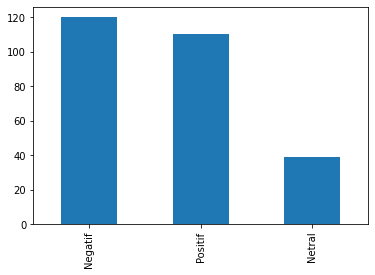

In [ ]:
s = pd.value_counts(tweet_df['Sentiments'])
ax = s.plot.bar()
n = len(tweet_df.index)
print (n)
for p in ax.patches:
    ax.annotate(str(round(p.get_height() / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))